<a href="https://colab.research.google.com/github/muh-fajri/muh-fajri/blob/main/Mini_Course_DA_Intro_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learning Objectives**


1. Cleaning data in python
2. EDA (Exploratory Data Analysis) in Python
3. Data Visualization in Python

## **Import Library**

What is:
* pandas?
* numpy?
* matplotlib.pyplot?
* seaborn?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Read data and Cleaning data**

Kind of data cleaning:
1. Change format of date column to proper datetime format.
2. Checking value typo of specific column and replace the data with the correct data.
3. Check duplicate using specific column (example: Invoice ID).

Other method: How to read CSV file in Google Drive to Collab?

In [2]:
# Read Google Sheet data
#sheet_url = 'https://docs.google.com/spreadsheets/d/1IwNyrNjtxM9byKRCjXxulpXC6ZlIKLx24dNslvQ5agU/edit#gid=0'
#sheet_url = 'https://docs.google.com/spreadsheets/d/1Rd7mD-cxCXQ1CUtJt-1YdzETvJa5rnv97_JhZHbyZEA/edit#gid=1903509374'
sheet_url = 'https://docs.google.com/spreadsheets/d/1BpTzPUw-VzKUWpjX0Tb2eO68LZhaTGbL4FEbuRPlxMY/edit#gid=1903509374'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1BpTzPUw-VzKUWpjX0Tb2eO68LZhaTGbL4FEbuRPlxMY/export?format=csv&gid=1903509374


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [4]:
# Copy columns
df.columns

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity'],
      dtype='object')

In [5]:
# Change type date
df_cleaned = df.copy() # Backup original dataframe

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date']) # convert to datetime format
df_cleaned['Revenue'] = df_cleaned['Unit price'] * df_cleaned['Quantity'] # add a new column

print(df_cleaned.info())
df_cleaned.head()

"""
In Pandas, date coulmn that is mix in order still can be read.
But, if in date column using uncommon format, it have to further setup
in pd.to_datetime
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
 10  Revenue        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB
None


'\nIn Pandas, date coulmn that is mix in order still can be read.\nBut, if in date column using uncommon format, it have to further setup\nin pd.to_datetime\n'

In [6]:
# Check typo (ensure the value as it is): one by one

#df_cleaned['City'].value_counts()
df_cleaned['Gender'].value_counts()

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64

In [7]:
# Check typo using loop for specific column: all in one
for col_name in ['Payment', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line']:
  print(df_cleaned[col_name].value_counts(), '\n')

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 



1. How to replace typo in Pandas?
2. List and dict in Python?

In [8]:
# Replace data
dict_typo = {'male' : 'Male',
             'female' : 'Female',
             'fml' : 'Female'}

# assign new variable of dataframe (df_cleaned to df_replaced)
df_replaced = df_cleaned.replace(dict_typo)
df_replaced.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [9]:
# Check result of replaced typo
df_replaced['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [10]:
# Check duplicate
df_replaced['Invoice ID'].duplicated().sum()

0

## **EDA**

### **Daily Trend Overall**

In [11]:
agg_daily = df_replaced.groupby('Date', as_index=False)['Revenue', 'Quantity'].sum()
agg_daily.head()

<ipython-input-11-316445d7fbb2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_daily = df_replaced.groupby('Date', as_index=False)['Revenue', 'Quantity'].sum()


,Date,Revenue,Quantity
0,2019-01-01,4519.22,81
1,2019-01-02,1852.86,48
2,2019-01-03,1979.17,37
3,2019-01-04,1546.37,32
4,2019-01-05,3368.27,55


How to create line plot in Python?

### **Create Visualization**

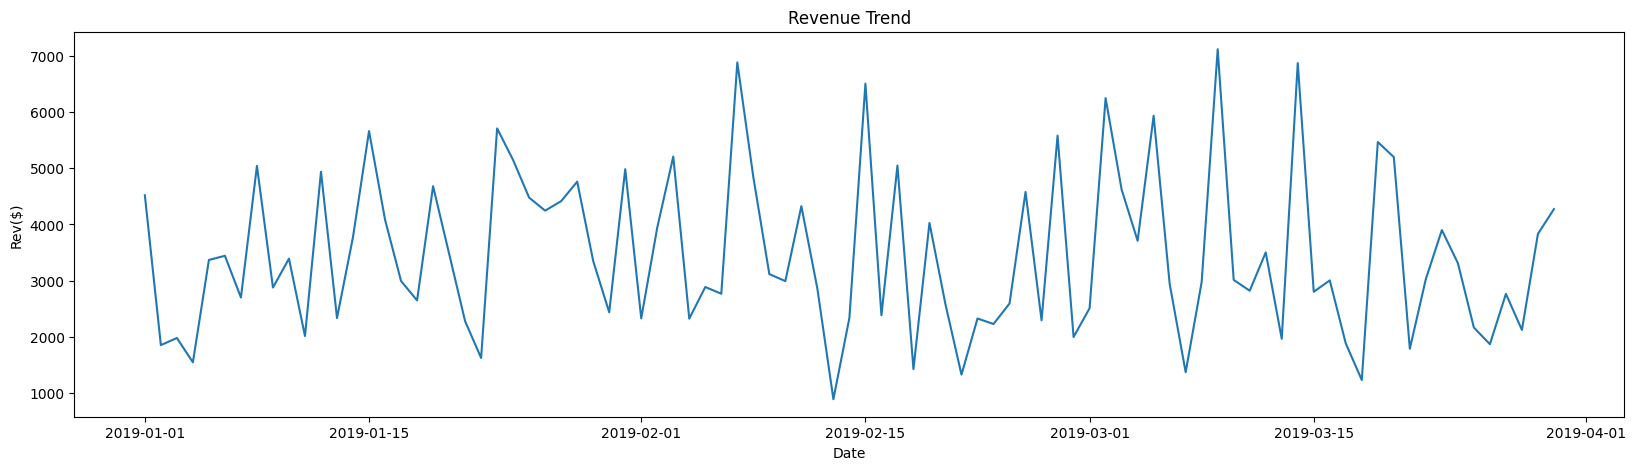

In [12]:
# Create plot (using matplotlib.pyplot)
plt.rcParams["figure.figsize"] = (20,5)

plt.plot('Date','Revenue', data=agg_daily)
plt.title('Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Rev($)')
plt.show()

Revenue of Our Data Has Seasonality

<Axes: xlabel='Date', ylabel='Quantity'>

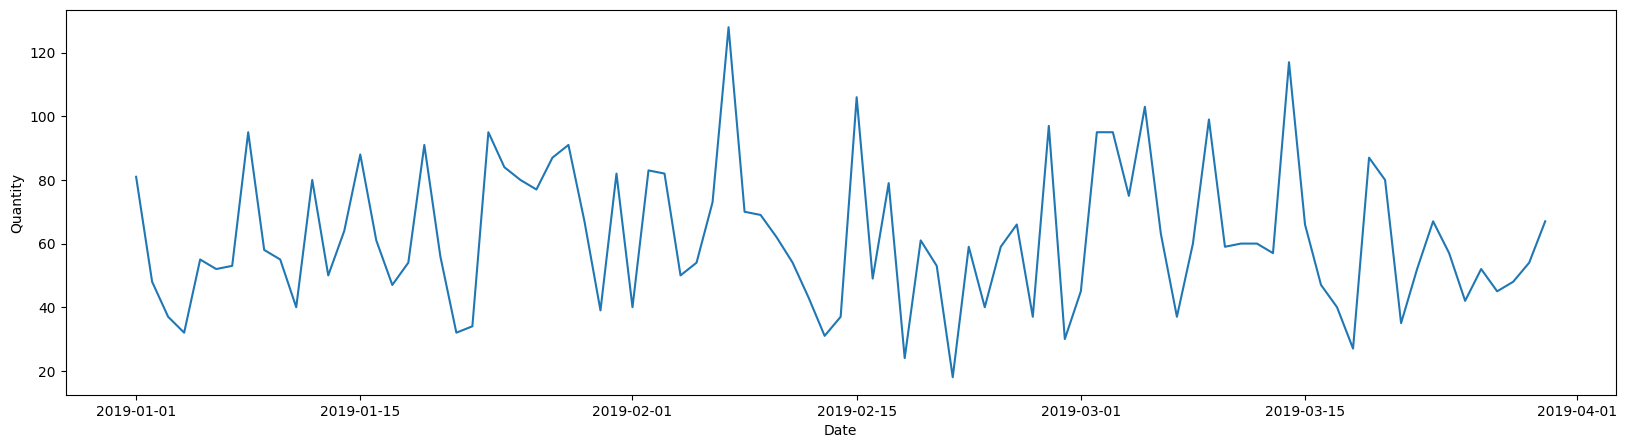

In [13]:
# Create visualization (using seaborn)
sns.lineplot(data = agg_daily, x='Date', y='Quantity')

#### **By Payment**

In [14]:
agg_payment = df_replaced.groupby('Payment', as_index=False).agg({'Revenue':'sum', 'Invoice ID':'nunique'})
agg_payment.head()

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


<Axes: xlabel='Payment', ylabel='Revenue'>

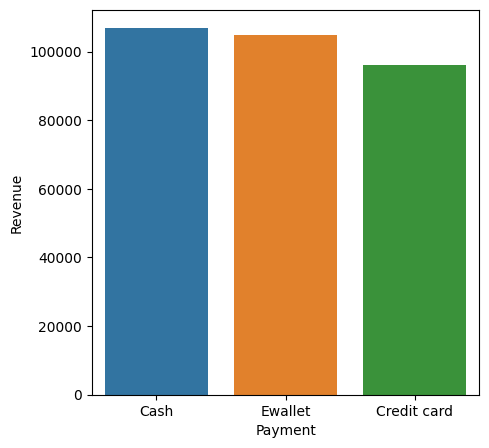

In [15]:
plt.rcParams["figure.figsize"] = (5,5)
sns.barplot(x='Payment', y='Revenue', data = agg_payment.sort_values('Revenue', ascending=False))

Highest Revenue Come From Cash

<Axes: xlabel='Payment', ylabel='Revenue'>

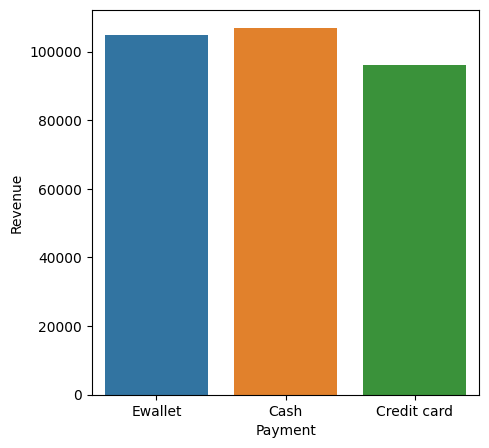

In [16]:
sns.barplot(x='Payment', y='Revenue', data = agg_payment.sort_values('Invoice ID', ascending=False))

From Count of Transaction, Ewallet is the Most

([<matplotlib.patches.Wedge at 0x7cf62f10c610>,
 [Text(0.5073032188378986, 0.976034550698236, 'Cash'),
  Text(-1.0997450371451651, -0.023682340986048763, 'Credit card'),
  Text(0.5281991633287692, -0.9648863372743903, 'Ewallet')],
 [Text(0.27671084663885376, 0.5323824821990377, '34.7%'),
  Text(-0.5998609293519083, -0.012917640537844778, '31.2%'),
  Text(0.288108634542965, -0.5263016385133037, '34.1%')])

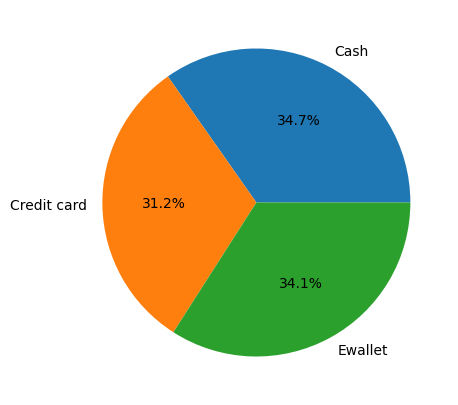

In [17]:
plt.pie(agg_payment['Revenue'], labels=agg_payment['Payment'],autopct='%.1f%%')

Cash Volume is 34.7% and it is 3.5% more than Credit Card

#### By Gender and By Product Type

In [18]:
agg_gender = df_replaced.groupby(['Gender', 'Product line'], as_index=False)['Invoice ID'].nunique()
agg_gender.head()

,Gender,Product line,Invoice ID
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79


<Axes: xlabel='Product line', ylabel='Invoice ID'>

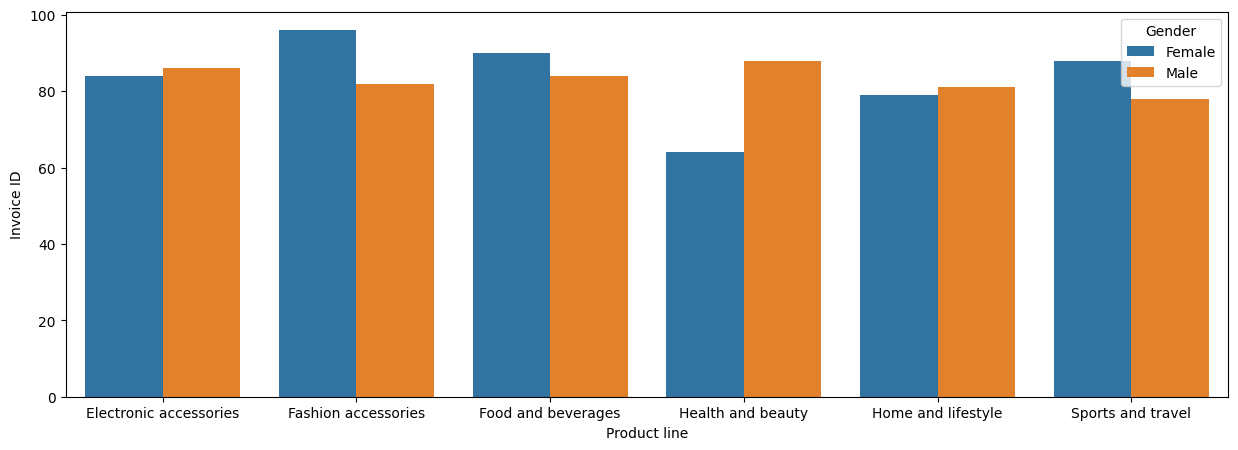

In [19]:
plt.rcParams["figure.figsize"] = (15,5)
sns.barplot(x='Product line', y='Invoice ID', data = agg_gender, hue='Gender')

Fashion Accessories is dominated by Female, and so forth.

***NOTE:***

*The most important in analyzing and visualizing of data is aggregation of columns to show business history.*